In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
recentDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
recentDate

('2017-08-23')

2016-08-23


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

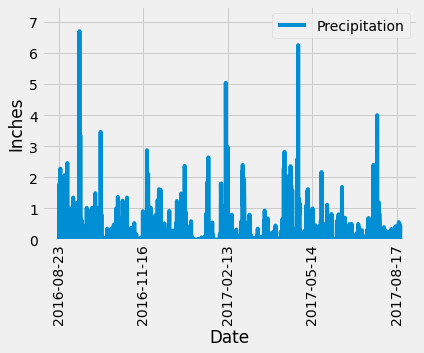

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)
# Perform a query to retrieve the data and precipitation scores
query_data = session.query(*[measurement.date,measurement.prcp]).filter(measurement.date >= "2016-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(query_data, columns = ["Date", "Precipitation"])
precip = precip.dropna(how="any")
precip = precip.set_index("Date")

# Sort the dataframe by date
precip=  precip.sort_values(["Date"], ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
precip.plot(y='Precipitation', use_index=True)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.ylim(0,7.5)
plt.xticks(rotation=90)

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number stations in the dataset
totalStations = session.query(station.id).count()
totalStations

9

In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(*[measurement.station, func.count(measurement.id)]).group_by(measurement.station).\
                order_by(func.count(measurement.id).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActiveTData = session.query(*[func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]).\
group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()
mostActiveTData

(54.0, 85.0, 71.66378066378067)

Text(0, 0.5, 'Frequency')

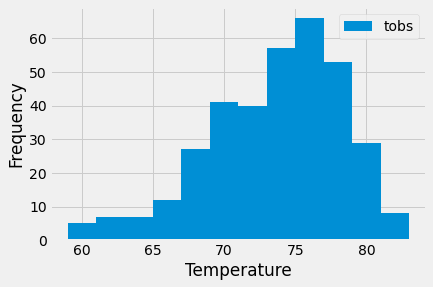

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(*[measurement.date,measurement.tobs]).filter(measurement.station == activeStations[0][0]).\
            filter(measurement.date >= "2016-08-23").all()
temperatures = pd.DataFrame(temp_data, columns = ["Date", "Temperature"])

plt.hist(temperatures["Temperature"],bins=12, label = "tobs")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [100]:
# Close Session
session.close()